<a href="https://colab.research.google.com/github/AYMAN-CHAREF/computer-vision/blob/main/TP4_Classification_de_la_BD_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist


In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

print(np.shape(x_train), np.shape(y_train))
print(np.shape(x_test), np.shape (y_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


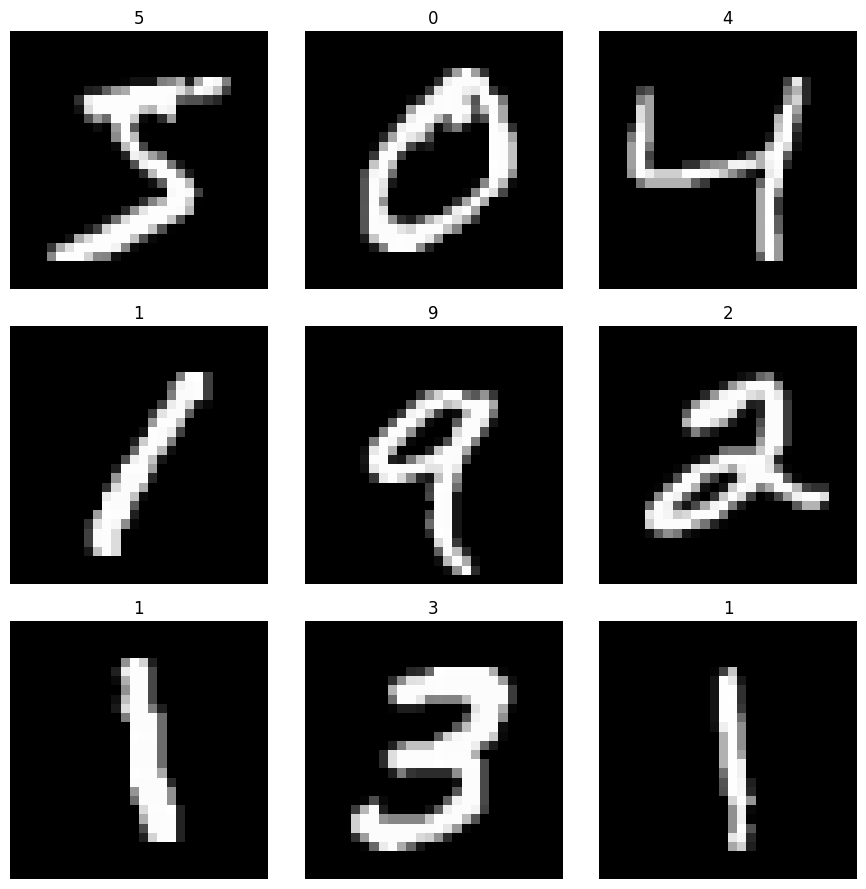

In [3]:
plt.rcParams["figure.figsize"] = [9., 9.]
plt.rcParams["figure.autolayout"] = True

fig, axs = plt.subplots(nrows=3, ncols=3)
axs = axs.flatten()
for ax,j in zip(axs, range(9)):
  ax.axis("off")

  ax.imshow(x_train[j], cmap='gray')
  ax.set_title(str(y_train[j]))


plt.show()

In [4]:
x_train_v=np.reshape(x_train,[60000,784])/255.
x_test_v=np.reshape(x_test,[10000,784])/255.

print(np.shape(x_train_v))
print(np.shape(x_test_v))

(60000, 784)
(10000, 784)


In [5]:
from tensorflow.keras.utils import to_categorical
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

print("avant", np.shape(y_train), "apres", np.shape(y_train_c))

print("Avant", y_train[10])
print("Apres", y_train_c[10])


avant (60000,) apres (60000, 10)
Avant 3
Apres [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [7]:
def perceptron_monocouche():
  inp=Input (shape = (784,))
  outp=Dense(10, activation="softmax") (inp)

  model=Model(inp,outp)

  model.summary()
  return model

In [8]:
fc="categorical_crossentropy"

In [9]:
optim=tf.keras.optimizers.SGD(learning_rate=0.001)

In [12]:
model=perceptron_monocouche()
model.compile(loss=fc, optimizer=optim, metrics=["accuracy"])
hist=model.fit(x_train_v, y_train_c, validation_data=(x_test_v, y_test_c), epochs=100, batch_size=100, shuffle=True)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2165 - loss: 2.1959 - val_accuracy: 0.5509 - val_loss: 1.8062
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5981 - loss: 1.7202 - val_accuracy: 0.7030 - val_loss: 1.4662
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7067 - loss: 1.4225 - val_accuracy: 0.7622 - val_loss: 1.2456
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7574 - loss: 1.2224 - val_accuracy: 0.7878 - val_loss: 1.0958
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7782 - loss: 1.0934 - val_accuracy: 0.8064 - val_loss: 0.9888
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7978 - loss: 0.9907 - val_accuracy: 0.8176 - val_loss: 0.9090
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8078 - loss: 0.9170 - val_accuracy: 0.8269 - val_loss: 0.8472
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8172 - loss: 0.8628 - val_accu